<a href="https://colab.research.google.com/github/mosh98/Swedish_Sentiment_BERTIL/blob/main/Sentiment_analys_med_BERTIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Text preprocessing 

https://www.youtube.com/watch?v=Osj0Z6rwJB4&t=192s&ab_channel=VenelinValkov



https://curiousily.com/posts/sentiment-analysis-with-bert-and-hugging-face-using-pytorch-and-python/


##sentiment analysis coursera

https://colab.research.google.com/drive/1Ducj_Cp2CiR0Z3chcon8mnZAK1wOMxI8#scrollTo=EMoNIl88syJN



In [ ]:
import pandas as pd
!git clone https://github.com/Kungbib/swedish-bert-models
!cd swedish-bert-models
!python3 -m venv venv
!source venv/bin/activate
!pip install --upgrade pip

Cloning into 'swedish-bert-models'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 232 (delta 9), reused 0 (delta 0), pack-reused 202
Receiving objects: 100% (232/232), 41.73 KiB | 8.35 MiB/s, done.
Resolving deltas: 100% (74/74), done.
The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt-get install python3-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: ['/content/venv/bin/python3', '-Im', 'ensurepip', '--upgrade', '--default-pip']

/bin/bash: venv/bin/activate: No such file or directory
     |████████████████████████████████| 1.5MB 13.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled

In [ ]:
!pip install -r /content/swedish-bert-models/requirements.txt

     |████████████████████████████████| 1.3 MB 28.1 MB/s 
     |████████████████████████████████| 1.1 MB 59.6 MB/s 
     |████████████████████████████████| 883 kB 66.1 MB/s 
     |████████████████████████████████| 2.9 MB 63.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893259 sha256=279e273c8fc2b8b5f72a1fe724cbe1df1ab9f98acd8d0f13e87f85272601da77
  Stored in directory: /root/.cache/pip/wheels/49/25/98/cdea9c79b2d9a22ccc59540b1784b67f06b633378e97f58da2
Successfully built sacremoses


In [ ]:
#dataset kommer ifrån  https://spraakbanken.gu.se/resurser/sentimentlex
df = pd.read_csv("/content/drive/My Drive/Research In Data Science/sentimentlex rensad - sentimentlex.csv",error_bad_lines=False)
df

,word,polarity,strength,sense,written_form,part_of_speech,confidence,lemgram,lemgram_frequency,lemma_frequency,example,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,luguber,neg,−2,luguber..1,['luguber'],av,1.15,luguber..av.1,116,116,Dessemellan ligger en lång och luguber period ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,överraskad,pos,2,NaN,NaN,av,0.25,överraskad..av.1,397,8716,Han var tydligt överraskad av frågan .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,förbittrad,neg,−2,förbittrad..1,['förbittrad'],av,0.50,förbittrad..av.1,95,605,Protestdemonstrationerna har förenat yttersta ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fördystra,neg,−2,fördystra..1,['fördystra'],vb,1.15,fördystra..vb.1,76,76,Utspelet kan ytterligare fördystra de redan sp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,beräknande,pos,2,beräknande..1,['beräknande'],av,1.15,beräknande..av.1,0,817,Den beräknande Gauguin insåg att det var något...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,inskränkt,neg,−2,NaN,NaN,av,0.25,inskränkt..av.1,153,2294,Hittills har fynden inskränkt sig till små bit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2063,vitmålad,pos,2,NaN,NaN,av,0.25,vitmålad..av.1,984,985,Mellan St : a Birgittas kapell och Sjömagasine...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2064,glitterfin,pos,2,glitterfin..1,['glitterfin'],av,0.50,glitterfin..av.1,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,spricka,neg,−2,spricka..1,['spricka'],vb,0.50,spricka..vb.1,11147,20255,"Om affären kring paragraf 152 har , enligt mån...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove 

*   Rows with NaN as value



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   word               2067 non-null   object 
 1   polarity           2067 non-null   object 
 2   strength           2067 non-null   object 
 3   sense              1397 non-null   object 
 4   written_form       1397 non-null   object 
 5   part_of_speech     2067 non-null   object 
 6   confidence         2067 non-null   float64
 7   lemgram            2067 non-null   object 
 8   lemgram_frequency  2067 non-null   int64  
 9   lemma_frequency    2067 non-null   object 
 10  example            1691 non-null   object 
 11  Unnamed: 11        1 non-null      object 
 12  Unnamed: 12        1 non-null      float64
 13  Unnamed: 13        1 non-null      object 
 14  Unnamed: 14        1 non-null      object 
 15  Unnamed: 15        1 non-null      object 
 16  Unnamed: 16        1 non

In [ ]:

df

,word,polarity,strength,sense,written_form,part_of_speech,confidence,lemgram,lemgram_frequency,lemma_frequency,example,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,luguber,neg,−2,luguber..1,['luguber'],av,1.15,luguber..av.1,116,116,Dessemellan ligger en lång och luguber period ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,överraskad,pos,2,NaN,NaN,av,0.25,överraskad..av.1,397,8716,Han var tydligt överraskad av frågan .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,förbittrad,neg,−2,förbittrad..1,['förbittrad'],av,0.50,förbittrad..av.1,95,605,Protestdemonstrationerna har förenat yttersta ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fördystra,neg,−2,fördystra..1,['fördystra'],vb,1.15,fördystra..vb.1,76,76,Utspelet kan ytterligare fördystra de redan sp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,beräknande,pos,2,beräknande..1,['beräknande'],av,1.15,beräknande..av.1,0,817,Den beräknande Gauguin insåg att det var något...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,inskränkt,neg,−2,NaN,NaN,av,0.25,inskränkt..av.1,153,2294,Hittills har fynden inskränkt sig till små bit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2063,vitmålad,pos,2,NaN,NaN,av,0.25,vitmålad..av.1,984,985,Mellan St : a Birgittas kapell och Sjömagasine...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2064,glitterfin,pos,2,glitterfin..1,['glitterfin'],av,0.50,glitterfin..av.1,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,spricka,neg,−2,spricka..1,['spricka'],vb,0.50,spricka..vb.1,11147,20255,"Om affären kring paragraf 152 har , enligt mån...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Data preprocessing

In [ ]:

#convert polarity into numbers or binary
#polarity is already converted to binary so who hooo

dataset__sentence_label = df[['polarity','example']]
dataset__sentence_label = dataset__sentence_label.dropna()
print(dataset__sentence_label)
sentence = dataset__sentence_label.example
label = dataset__sentence_label.polarity

sentence

     polarity                                            example
0         neg  Dessemellan ligger en lång och luguber period ...
1         pos             Han var tydligt överraskad av frågan .
2         neg  Protestdemonstrationerna har förenat yttersta ...
3         neg  Utspelet kan ytterligare fördystra de redan sp...
4         pos  Den beräknande Gauguin insåg att det var något...
...       ...                                                ...
2060      pos  Han drabbades redan som barn av det kreativa r...
2062      neg  Hittills har fynden inskränkt sig till små bit...
2063      pos  Mellan St : a Birgittas kapell och Sjömagasine...
2065      neg  Om affären kring paragraf 152 har , enligt mån...
2066      pos  Shetlandsponnyn är en urstark , timid , vänlig...

[1691 rows x 2 columns]


0       Dessemellan ligger en lång och luguber period ...
1                  Han var tydligt överraskad av frågan .
2       Protestdemonstrationerna har förenat yttersta ...
3       Utspelet kan ytterligare fördystra de redan sp...
4       Den beräknande Gauguin insåg att det var något...
                              ...                        
2060    Han drabbades redan som barn av det kreativa r...
2062    Hittills har fynden inskränkt sig till små bit...
2063    Mellan St : a Birgittas kapell och Sjömagasine...
2065    Om affären kring paragraf 152 har , enligt mån...
2066    Shetlandsponnyn är en urstark , timid , vänlig...
Name: example, Length: 1691, dtype: object

In [ ]:
token_lens= []

for txt in dataset__sentence_label.example:
  tokens = tokenizer.encode(txt,max_length=512)
  token_lens.append(len(tokens))




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Token count')

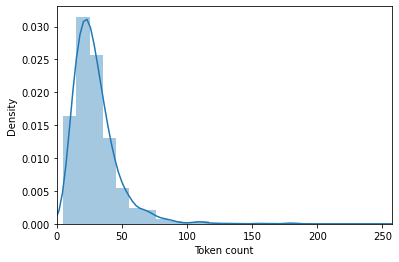

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(token_lens)
plt.xlim([0,257])
plt.xlabel('Token count')

##Special Attention for Mr. Bert ;)


In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoModel,AutoTokenizer,TFAutoModel
tokenizer = AutoTokenizer.from_pretrained('KB/bert-base-swedish-cased')
model = AutoModel.from_pretrained('KB/bert-base-swedish-cased')

In [ ]:
sample_txt = sentence[0]

tokens = tokenizer.tokenize(sample_txt)

token_ids = tokenizer.convert_tokens_to_ids(tokens)


print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')


 Sentence: Dessemellan ligger en lång och luguber period som stalinistiskt lydparti .
   Tokens: ['Dess', '##emellan', 'ligger', 'en', 'lång', 'och', 'lug', '##uber', 'period', 'som', 'stalin', '##istiskt', 'ly', '##d', '##parti', '.']
Token IDs: [2008, 19412, 536, 59, 747, 36, 2358, 40485, 4321, 67, 46301, 6025, 1869, 49799, 12933, 7]


In [ ]:
MAX_LEN = 128

EPOCHS = 20


###Test train Split

In [ ]:
frames = [sentence,label]
new_df = pd.concat(frames,axis=1)

#data["income"].replace({ ' <=50K': 0, ' >50K':1 }, inplace=True)
new_df["polarity"].replace({'pos':1,'neg':0},inplace=True)
print(new_df)
new_df.info()

                                                example  polarity
0     Dessemellan ligger en lång och luguber period ...         0
1                Han var tydligt överraskad av frågan .         1
2     Protestdemonstrationerna har förenat yttersta ...         0
3     Utspelet kan ytterligare fördystra de redan sp...         0
4     Den beräknande Gauguin insåg att det var något...         1
...                                                 ...       ...
2060  Han drabbades redan som barn av det kreativa r...         1
2062  Hittills har fynden inskränkt sig till små bit...         0
2063  Mellan St : a Birgittas kapell och Sjömagasine...         1
2065  Om affären kring paragraf 152 har , enligt mån...         0
2066  Shetlandsponnyn är en urstark , timid , vänlig...         1

[1691 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2066
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset,DataLoader, RandomSampler, SequentialSampler



df_train, df_test = train_test_split(new_df, test_size =0.1, random_state= 1234)
df_val,df_test = train_test_split(df_test,test_size=0.5,random_state=1234)

df_test.shape,df_val.shape

((85, 2), (85, 2))

In [ ]:
#encoded_data_train = 

In [ ]:
import torch
from torch.utils.data import TensorDataset
device = torch.device("cuda")

In [ ]:
torched_labels = torch.tensor(new_df.polarity.values)

In [ ]:
encoded_data = tokenizer.batch_encode_plus(
    new_df.example.values,
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
input_ids = []
attention_masks = []
labels = []

for sent in new_df.example:
    encoded_dict = tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = 100,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                      )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])
    






/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
tensor_data = TensorDataset(encoded_data['input_ids'],encoded_data['attention_mask'],torched_labels)

In [ ]:
BATCH_SIZE = 8

dataLoader = DataLoader(tensor_data,sampler=RandomSampler(tensor_data),batch_size=BATCH_SIZE)


Optimizer

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

epochs = 3
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataLoader)*epochs)

In [ ]:
import random
import numpy as np


seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)